In [1]:
from PIL import Image
from WaterRegionSegmentation.WaterRegion import WaterRegion

import cv2
import timeit
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
water_region = WaterRegion()

In [3]:
default_size = water_region.inputSize()
default_height = default_size[0]
default_width = default_size[1]

In [4]:
demo_2016 = Image.open('DemoData/copais_s2cloudless.jpg').resize((256, 256))
demo_2019 = Image.open('DemoData/copais_s2cloudless-2019.jpg').resize((256, 256))

In [5]:
demo_2016 = np.array(demo_2016)
demo_2019 = np.array(demo_2019)

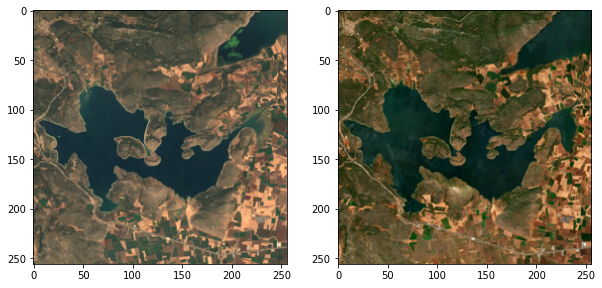

In [6]:
_, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(demo_2016)
axs[1].imshow(demo_2019)

In [39]:
y = np.stack([demo_2016, demo_2019])

In [40]:
predicted_masks = water_region.identifyRegion(y) 

In [41]:
pred_list = water_region.identifyRegion(y) 

In [42]:
pred_list = list(map(np.squeeze, pred_list))

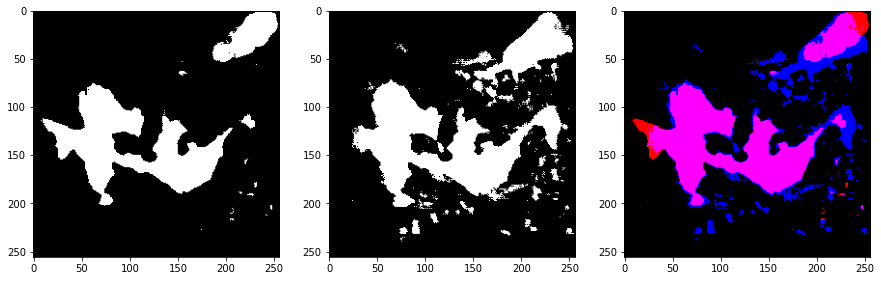

In [43]:
_, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(pred_list[0], cmap='gray')
axs[1].imshow(pred_list[1], cmap='gray')
axs[2].imshow(water_region.compositeMask(pred_list[0], pred_list[1]))

In [44]:
water_region.iou(pred_list[0], pred_list[1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.64006865>

In [45]:
water_region.netChange(pred_list[0], pred_list[1])

<tf.Tensor: shape=(), dtype=float32, numpy=-4527.0>

In [12]:
m1 = np.array([
      [1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]])

m2 = np.array([
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
m1_red = np.stack([m1, np.zeros(m1.shape), np.zeros(m1.shape)], axis=2)
m2_blue = np.stack([np.zeros(m2.shape), np.zeros(m2.shape), m2], axis=2)

In [15]:
composite = (m1_red+m2_blue)
composite[composite >= 0.5] = 1
composite[composite < 0.5] = 0

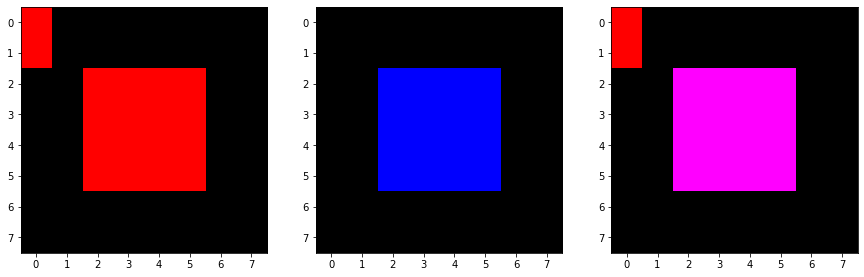

In [22]:
_, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(m1_red)
axs[1].imshow(m2_blue)
axs[2].imshow(composite)

In [17]:
iou_value = water_region.iou(m1, m2)
iou_value

<tf.Tensor: shape=(), dtype=float64, numpy=0.8888888888888888>

In [18]:
water_region.iou(pred_list[0], pred_list[1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.64006865>

In [23]:
water_region.netChange(m1, m2)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

Lake Geneva

In [26]:
input_image_1 = water_region.convertFromJP2('DemoData/T31TGM_20190629T103031_TCI_10m.jp2')
input_image_2 = water_region.convertFromJP2('DemoData/Geneva_T31TGM_20200623T103031_TCI_10m.jp2')

In [27]:
input_image_1 = cv2.resize(input_image_1, (default_height, default_width), interpolation = cv2.INTER_CUBIC)
input_image_2 = cv2.resize(input_image_2, (default_height, default_width), interpolation = cv2.INTER_CUBIC)

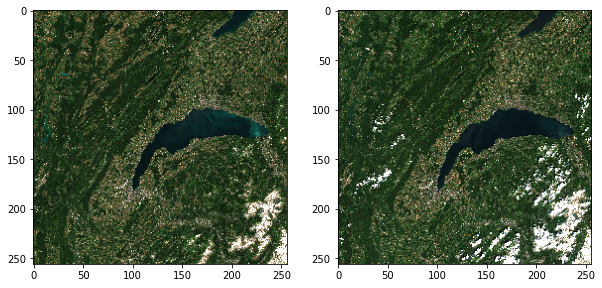

In [28]:
_, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(input_image_1)
axs[1].imshow(input_image_2)

In [29]:
preds = water_region.identifyRegion(np.array([input_image_1, input_image_2]))

In [30]:
composite = water_region.compositeMask(preds[0].squeeze(), preds[1].squeeze())

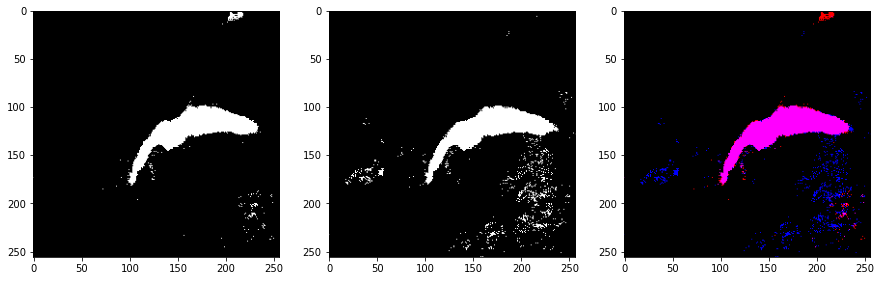

In [31]:
_, axs = plt.subplots(1,3, figsize=(15, 5))

axs[0].imshow(preds[0].squeeze(), cmap='gray')
axs[1].imshow(preds[1].squeeze(), cmap='gray')
axs[2].imshow(composite)

In [32]:
water_region.iou(preds[0], preds[1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.71926606>

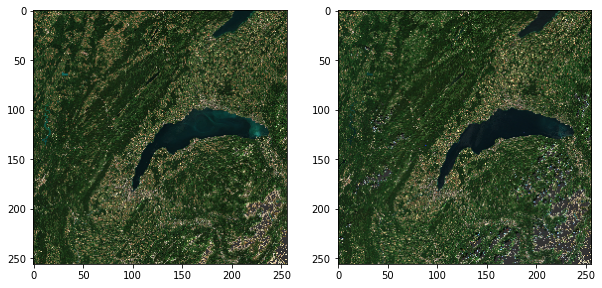

In [33]:
lake1 = water_region.defrost(input_image_1)
lake2 = water_region.defrost(input_image_2)

_, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(lake1)
axs[1].imshow(lake2)

In [34]:
y = np.array([lake1, lake2])

In [35]:
predicted_masks = water_region.identifyRegion(y)

In [36]:
comp = water_region.compositeMask(predicted_masks[0].squeeze(), predicted_masks[1].squeeze())

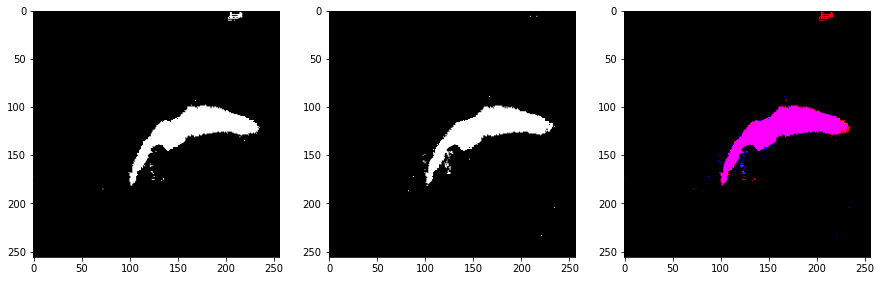

In [37]:
_, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(predicted_masks[0].squeeze(), cmap='gray')
axs[1].imshow(predicted_masks[1].squeeze(), cmap='gray')
axs[2].imshow(comp.squeeze(), cmap = 'binary')

In [38]:
water_region.iou(predicted_masks[0], predicted_masks[1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.90968704>

In [46]:
denoised_1 = water_region.denoise(pred_list[0], 0.6, strides=(4,4))
denoised_2 = water_region.denoise(pred_list[1], 0.6, strides=(4,4))

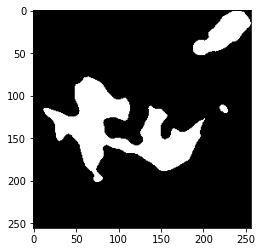

In [47]:
plt.imshow(denoised_1, cmap='gray')

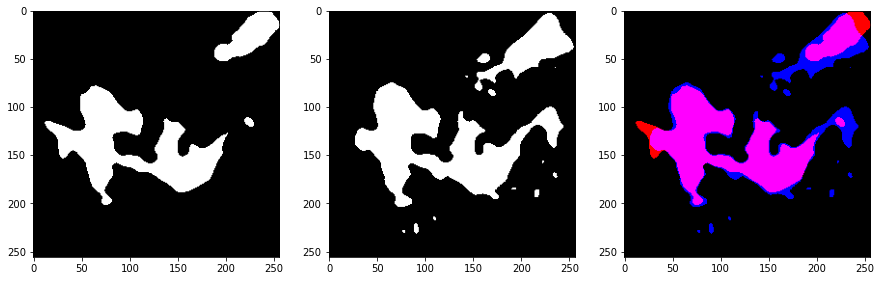

In [49]:
_, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(denoised_1, cmap='gray')
axs[1].imshow(denoised_2, cmap='gray')
axs[2].imshow(water_region.compositeMask(denoised_1, denoised_2))

In [50]:
water_region.iou(denoised_1, denoised_2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6933391>

In [51]:
water_region.netChange(denoised_1, denoised_2)

<tf.Tensor: shape=(), dtype=float32, numpy=-2972.0>

In [22]:
perf_record = dict()

In [23]:
for i in range(100,10000, 500):
    perf = timeit.timeit(lambda: water_region.identifyRegion(demo_2019), number=i)
    print(perf)
    perf_record[i] = perf

6.886399740003981
43.78271963901352
84.35358643601649
125.252697301039
168.56734819198027
209.52231722703436
250.71235994598828
356.603611018043
431.60222411499126
445.8992730869795
418.69693401799304
453.8380662089912
493.42656249395804
531.5714018009603
569.9580841579591
598.9050192899886
640.0608080829843
678.1725975369918
715.0244637539727
753.7963399640284


In [27]:
perf_record.values()

dict_values([6.886399740003981, 43.78271963901352, 84.35358643601649, 125.252697301039, 168.56734819198027, 209.52231722703436, 250.71235994598828, 356.603611018043, 431.60222411499126, 445.8992730869795, 418.69693401799304, 453.8380662089912, 493.42656249395804, 531.5714018009603, 569.9580841579591, 598.9050192899886, 640.0608080829843, 678.1725975369918, 715.0244637539727, 753.7963399640284])

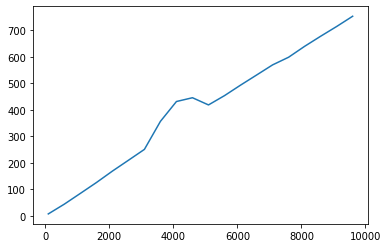

In [28]:
plt.plot(list(perf_record.keys()), list(perf_record.values()))